In [5]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [17]:
features = pd.read_csv('Dataset/kddcup.names.txt')
data = pd.read_csv('kddcup.data_10_percent.txt').to_numpy(dtype='object')

print(data.shape)
rows = data.shape[0]
columns = data.shape[1]

(494020, 42)


In [30]:
# store non number features
NaN_features_idx = []
for i in range(columns):
    if type(data[0][i]) == str:
        NaN_features_idx.append(i)

print(NaN_features_idx)

NaN_data = np.array([data[:,NaN_features_idx]])
print(NaN_data)

labels = np.array(data[:,-1])
print(labels)

[1, 2, 3, 41]
[[['tcp' 'http' 'SF' 'normal.']
  ['tcp' 'http' 'SF' 'normal.']
  ['tcp' 'http' 'SF' 'normal.']
  ...
  ['tcp' 'http' 'SF' 'normal.']
  ['tcp' 'http' 'SF' 'normal.']
  ['tcp' 'http' 'SF' 'normal.']]]
['normal.' 'normal.' 'normal.' ... 'normal.' 'normal.' 'normal.']


In [34]:
# data with no NaN
features_idx = []
for i in range(columns):
    if i not in NaN_features_idx:
        features_idx.append(i)

features = np.array(data[:, features_idx])

features[0]

array([0, 239, 486, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 8,
       0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 19, 19, 1.0, 0.0, 0.05, 0.0,
       0.0, 0.0, 0.0, 0.0], dtype=object)

In [33]:
# count the frequency of each label
type_dict = {}
for i in range(len(labels)):
    if labels[i] in type_dict:
        type_dict[labels[i]] += 1
    else:
        type_dict[labels[i]] = 1

type_dict

{'normal.': 97277,
 'buffer_overflow.': 30,
 'loadmodule.': 9,
 'perl.': 3,
 'neptune.': 107201,
 'smurf.': 280790,
 'guess_passwd.': 53,
 'pod.': 264,
 'teardrop.': 979,
 'portsweep.': 1040,
 'ipsweep.': 1247,
 'land.': 21,
 'ftp_write.': 8,
 'back.': 2203,
 'imap.': 12,
 'satan.': 1589,
 'phf.': 4,
 'nmap.': 231,
 'multihop.': 7,
 'warezmaster.': 20,
 'warezclient.': 1020,
 'spy.': 2,
 'rootkit.': 10}

In [38]:
# Set up an array of k's from 1 to 100 and an array where we will store the objective function (inertia)
k = np.linspace(1, 100, 100)
inertia = []

subset = 10000
features = features[:subset]

In [39]:
# Run kmeans for k in [1,100] and save the inertia (takes a while to finish)
for i in k:
    kmeans = KMeans(n_clusters=int(i)).fit(features)
    inertia.append(kmeans.inertia_)

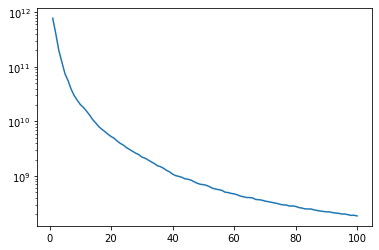

In [40]:
# Plot k against inertia in a log plot
plt.plot(k, inertia)
plt.yscale('log')
plt.show()

In [43]:
#subtask 2
features_mean = np.mean(features, axis=0)
features_dev = np.std(features)
features_dev

1523.457464020177

In [44]:
inertia = []
for i in range(len(features)):
    for j in range(len(features[i])):
        features[i][j] = (features[i][j] - features_mean[j])/features_dev

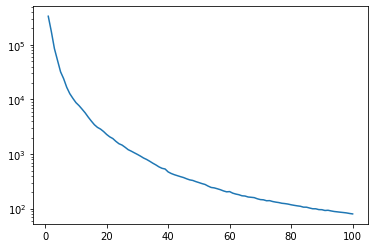

In [45]:
for i in k:
    kmeans = KMeans(n_clusters=int(i)).fit(features)
    inertia.append(kmeans.inertia_)

plt.plot(k, inertia)
plt.yscale('log')
plt.show()